## Задача регрессии

Создадим датасет в виде прямой с шумами

In [2]:
import numpy as np

X = 2 * np.random.rand(1000, 1)
X[:10]

k = 3
b = 4
y = 4 + 3*X + np.random.randn(1000, 1)
y[:10]

X[:10], y[:10]


(array([[1.99567562],
        [1.33225779],
        [1.08555238],
        [1.11600994],
        [1.42545456],
        [0.07404568],
        [1.79562806],
        [0.25215202],
        [1.24139734],
        [1.20929422]]),
 array([[9.79385558],
        [6.41054634],
        [5.9147169 ],
        [9.60803741],
        [8.76508076],
        [3.52876521],
        [9.67850278],
        [5.29894564],
        [7.46403534],
        [6.72033312]]))

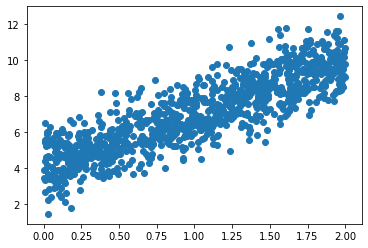

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Создадим модель

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
model = keras.Sequential(
    [layers.Input(shape=(1, )),
     layers.Dense(3, activation='relu'),
     layers.Dense(1)     
     ]
)

In [12]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(),
    metrics=['MeanSquaredError']
)

In [13]:
history = model.fit(X_train, y_train, batch_size=64, epochs=2, validation_split=0.2)
test_scores = model.evaluate(X_test, y_test, verbose=2)

print('Test loss: ', test_scores[0])
print('Test accuracy', test_scores[1])

Epoch 1/2
10/10 [==============================] - 0s 10ms/step - loss: 1.2685 - mean_squared_error: 1.2685 - val_loss: 1.4039 - val_mean_squared_error: 1.4039
Epoch 2/2
10/10 [==============================] - 0s 2ms/step - loss: 1.2183 - mean_squared_error: 1.2183 - val_loss: 1.3518 - val_mean_squared_error: 1.3518
7/7 - 0s - loss: 1.0739 - mean_squared_error: 1.0739
Test loss:  1.073880672454834
Test accuracy 1.073880672454834
